# Домашнее задание № 1

### Автор: Кузнецов С.И.

**Задание:** Скачайте материалы к ДЗ. Проанализируйте ряды, сделайте их стационарными.

Подгружаем необходимые библиотеки и функции

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

In [2]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [3]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

### 1. monthly-us-auto-registration-tho

In [4]:
auto_registration = pd.read_csv('monthly-us-auto-registration-tho.csv', sep = ';')
auto_registration.head()

,Month,Monthly U.S. auto registration (thousands) 1947 ? 1968
0,1947-01,209
1,1947-02,214
2,1947-03,265
3,1947-04,290
4,1947-05,287


In [5]:
auto_registration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 2 columns):
Month                                                     264 non-null object
Monthly U.S. auto registration (thousands) 1947 ? 1968    264 non-null int64
dtypes: int64(1), object(1)
memory usage: 4.2+ KB


Выводим ряд:

Results of Dickey-Fuller Test:
Test Statistic                  -1.225039
p-value                          0.662733
#Lags Used                      15.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


/home/sergmath/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


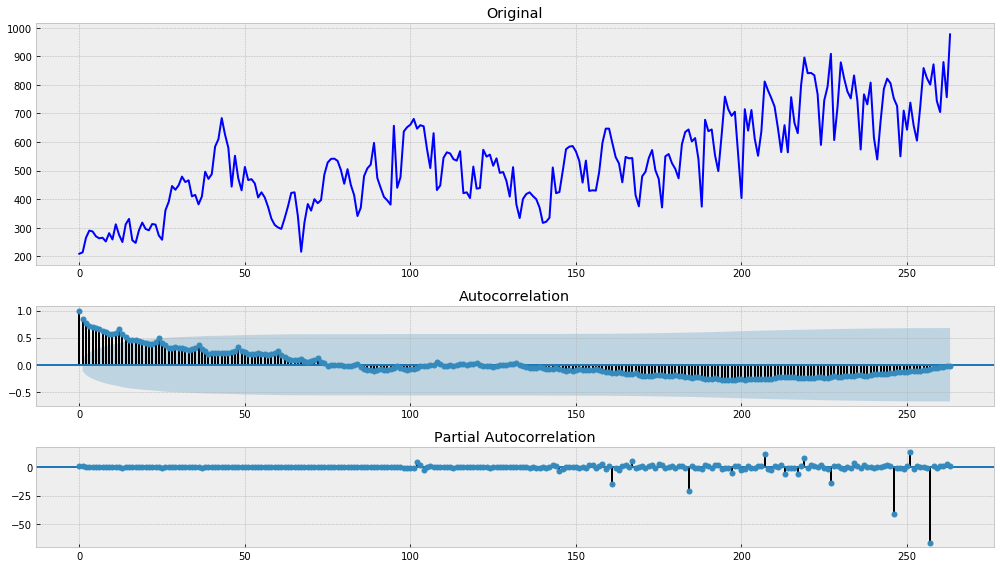

In [6]:
series_auto_registration_0 = auto_registration['Monthly U.S. auto registration (thousands) 1947 ? 1968']
tsplot(series_auto_registration_0)

Ряд является нестационарным, т.к. 

1. Тест Дики - Фуллера не дает оснований отвергнуть гипотезу о нестационарности ряда.
2. График автокорреляции
3. По графику ряда видно наличие тренда.

Для избавления от тренда применим преобразование Бокса-Кокса

Results of Dickey-Fuller Test:
Test Statistic                  -1.941628
p-value                          0.312738
#Lags Used                      14.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


/home/sergmath/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


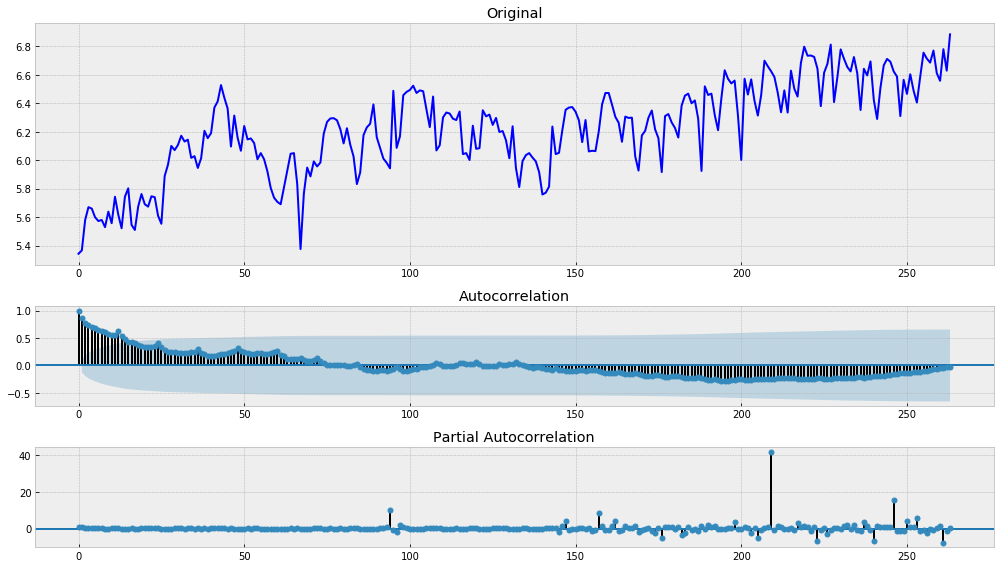

In [7]:
series_auto_registration_1 = boxcox(series_auto_registration_0, 0)
tsplot(series_auto_registration_1)

Ряд по-прежнему является нестационарным, т.к. присутствует сезонность.
Для избавления от сезонности продифференцируем ряд

Results of Dickey-Fuller Test:
Test Statistic                  -4.362471
p-value                          0.000346
#Lags Used                      14.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


/home/sergmath/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


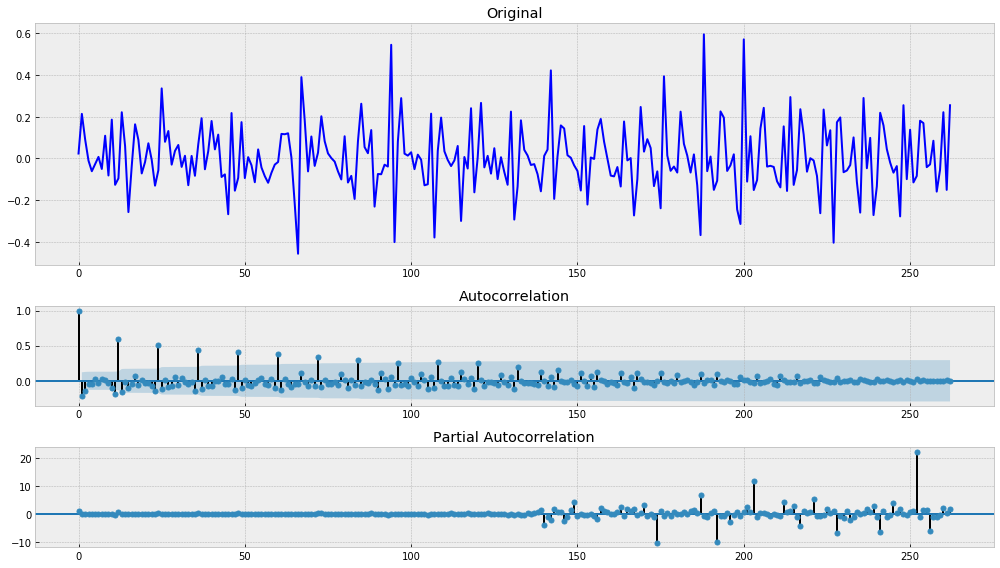

In [8]:
series_auto_registration_2 = series_auto_registration_1[1:] - series_auto_registration_1[:-1]
tsplot(series_auto_registration_2)

На графике автокорреляций видны периодические всплески с определенным шагом

Results of Dickey-Fuller Test:
Test Statistic                -6.480475e+00
p-value                        1.298830e-08
#Lags Used                     1.000000e+00
Number of Observations Used    4.800000e+01
Critical Value (1%)           -3.574589e+00
Critical Value (5%)           -2.923954e+00
Critical Value (10%)          -2.600039e+00
dtype: float64


/home/sergmath/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


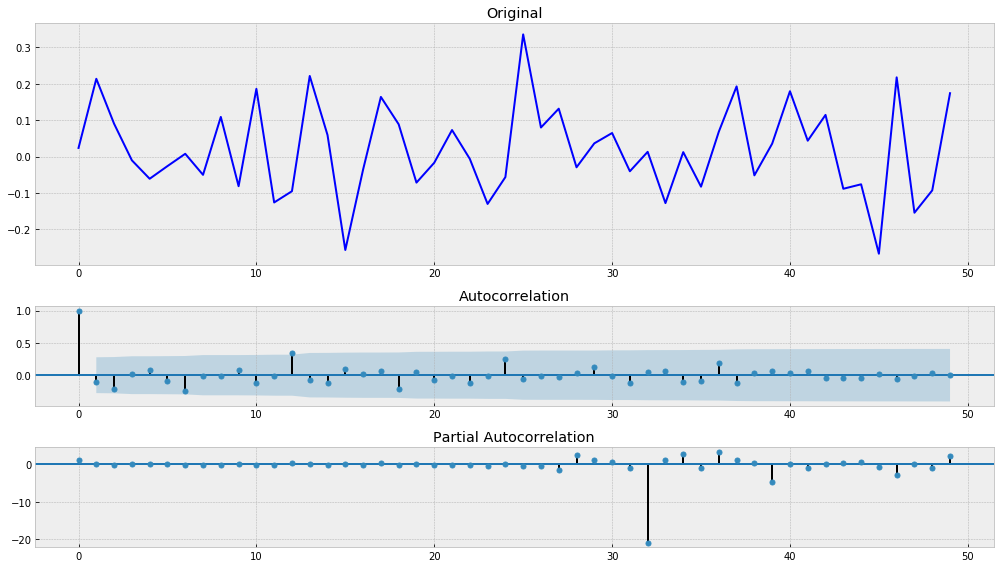

In [9]:
tsplot(series_auto_registration_2[:50])

Видно, что шаг равен 12 (что логично, т.к. график показывает регистрации по месяцам).
Для избавления от сезонности еще раз продифференцируем с шагом 12

Results of Dickey-Fuller Test:
Test Statistic                -6.528275e+00
p-value                        1.001817e-08
#Lags Used                     1.200000e+01
Number of Observations Used    2.380000e+02
Critical Value (1%)           -3.458128e+00
Critical Value (5%)           -2.873762e+00
Critical Value (10%)          -2.573283e+00
dtype: float64


/home/sergmath/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


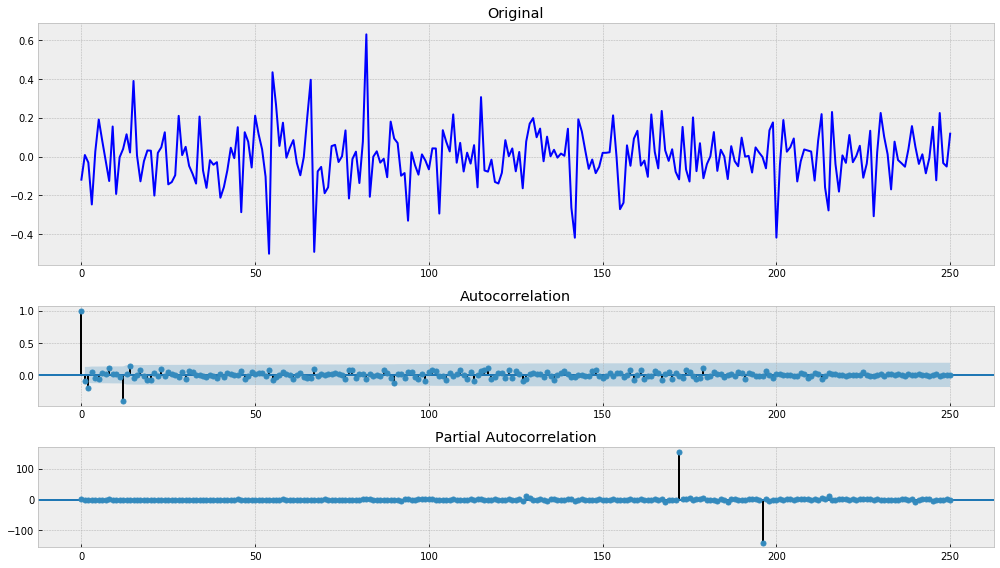

In [10]:
series_auto_registration_3 = series_auto_registration_2[12:] - series_auto_registration_2[:-12]
tsplot(series_auto_registration_3)

Теперь ряд является стационарным.
Тест Дики - Фуллера позволяет принять гипотезу о стационарности.
Кроме того, это видно из графика автокорреляции. Отдельные выбросы есть, но из мало.

### 2. monthly-us-auto-registration-tho

In [11]:
dowjones = pd.read_csv('weekly-closings-of-the-dowjones-.csv')
dowjones.head()

,Week,"Weekly closings of the Dow-Jones industrial average, July 1971 ? August 1974"
0,1971-W27,890.19
1,1971-W28,901.80
2,1971-W29,888.51
3,1971-W30,887.78
4,1971-W31,858.43


In [12]:
dowjones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 2 columns):
Week                                                                            162 non-null object
Weekly closings of the Dow-Jones industrial average, July 1971 ? August 1974    162 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.6+ KB


Выводим ряд:

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


/home/sergmath/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


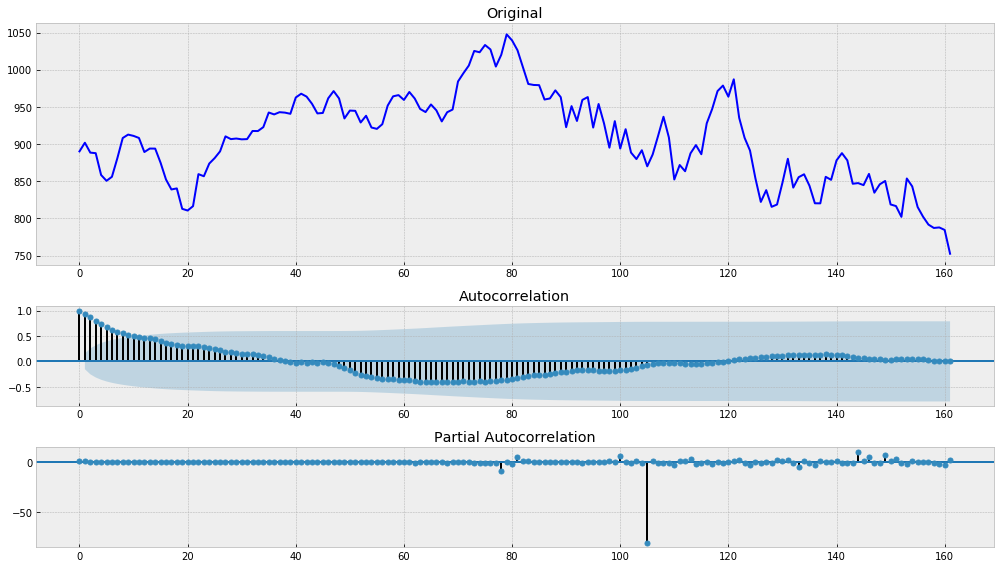

In [13]:
series_dowjones_0 = dowjones['Weekly closings of the Dow-Jones industrial average, July 1971 ? August 1974']
tsplot(series_dowjones_0)

Ряд является нестационарным. Тест Дики - Фуллера не позволяет принять гипотезу о стационарности ряда. 
Кроме того, га графике виден тренд. Для избавления от тренда применим преобразование Бокса - Кокса

Results of Dickey-Fuller Test:
Test Statistic                  -1.210369
p-value                          0.669119
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


/home/sergmath/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


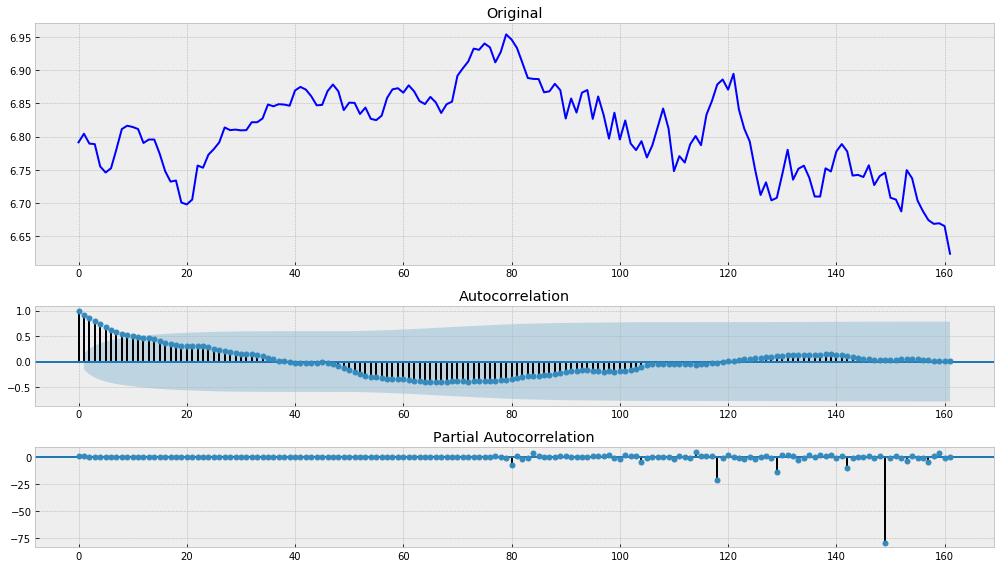

In [14]:
series_dowjones_1 = boxcox(series_dowjones_0, 0)
tsplot(series_dowjones_1)

Ряд по прежнему нестационарен. Для приведения его к стационарному виду применим дифференцирование

Results of Dickey-Fuller Test:
Test Statistic                -1.299582e+01
p-value                        2.751609e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


/home/sergmath/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


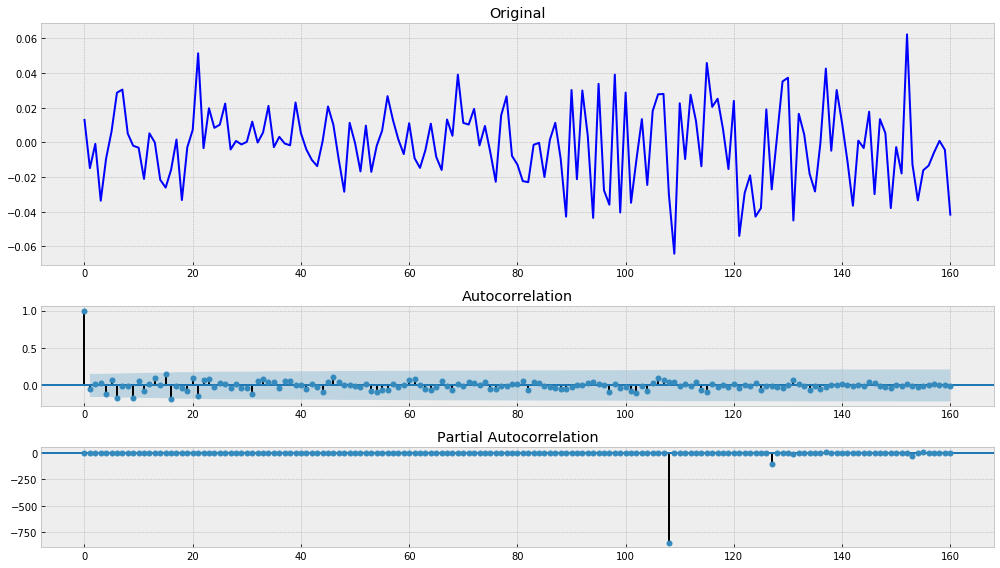

In [15]:
series_dowjones_2 = series_dowjones_1[1:] - series_dowjones_1[:-1]
tsplot(series_dowjones_2)

Теперь мы получили стационарный ряд. Тест Дики - Фуллера позволяет принять гипотезу о стационарности. 
Коррелограмма ряда также свидетельствует о его стационарности.